**Importing Libraries**

In [14]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

# Pipeline library for Training
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

**Data Preprocessing**

In [15]:
X = pd.read_csv('C:/VS CODE/Projects/Classification/Kaggle Task/train.csv') # Copy path of your data and paste 
X_test = pd.read_csv('C:/VS CODE/Projects/Classification/Kaggle Task/test.csv') # Copy path of your data and paste 
print(X.shape, X_test.shape)

(891, 12) (418, 11)


In [16]:
# Remove rows with missing target, seperate target from predictors
X.dropna(axis=0, subset=['Survived'], inplace=True)
y = X.Survived
X.drop(['Survived'], axis=1, inplace=True)

In [17]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X.columns if X[cname].nunique() < 10 and X[cname].dtype == 'object']

In [18]:
# Select numerical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['float64', 'int64']]

In [19]:
# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X = X[my_cols].copy()
X_test = X[my_cols].copy()

In [20]:
X_ = pd.read_csv('C:/VS CODE/Projects/Classification/Kaggle Task/train.csv')

<Axes: xlabel='Pclass', ylabel='count'>

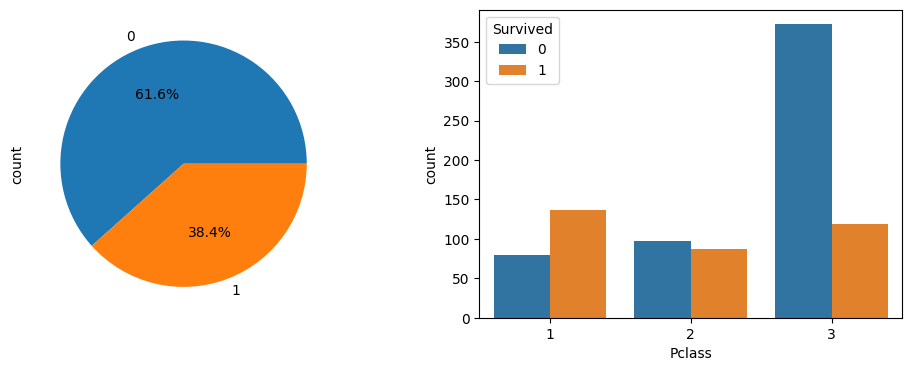

In [21]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))

X_['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])

sns.countplot(x="Pclass", hue='Survived', data=X_, ax=ax[1])

In [22]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

**Modeling & Evaluate Score**

In [23]:
rf_clf = RandomForestClassifier()

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_clf)
])

print(cross_val_score(clf, X, y, cv=10).mean())

0.819338327091136


# **Model Evaluation**

**1. Confusion Matrix**

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<Axes: >

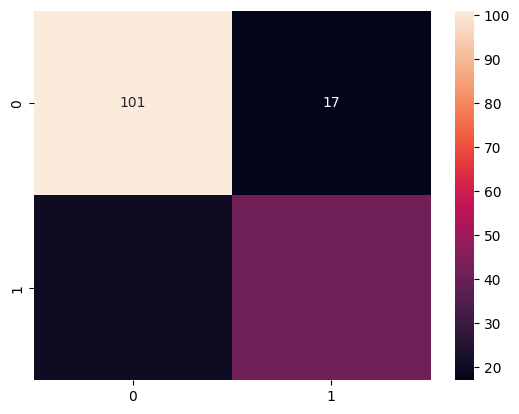

In [25]:
# train_test_split: 80%, 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Modeling
rf_clf = RandomForestClassifier()

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_clf)
])

# Train
clf.fit(X_train, y_train)
preds = clf.predict(X_val)

# Confusion matrix
cm = confusion_matrix(y_val, preds)
sns.heatmap(cm, annot=True, fmt="d")

**Accuracy**

In [26]:
clf.score(X_val, y_val)

0.7932960893854749

In [27]:
accuracy_score(y_val, preds)

0.7932960893854749

**Classification report**

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       118
           1       0.71      0.67      0.69        61

    accuracy                           0.79       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179



**Auc-Roc curve**

In [29]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

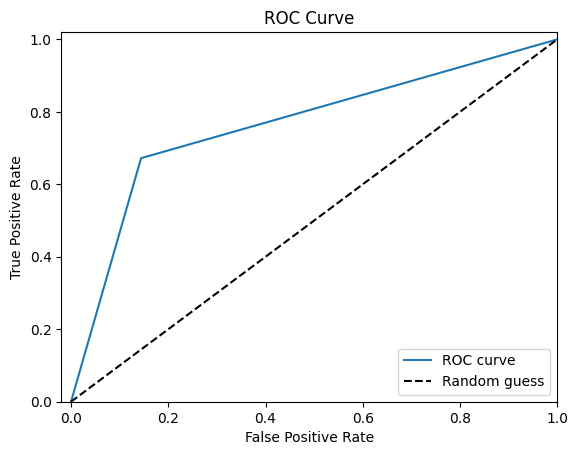

In [30]:
fpr, tpr, thresholds = roc_curve(y_val, preds)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

**Logistic Loss**

In [31]:
from sklearn.metrics import log_loss
log_loss(y_val, preds)

7.450364108364997